# 2. Accessing Text Corpora and Lexical Resources

## Part 1 Accessing Text Corpora

## 1.1 Gutenberg Corpus
### nltk包括Gutenberg電子文件存檔中的一小部分，其中包含約25,000本免費電子書，託管於http://www.gutenberg.org/ 。我們首先import nltk，然後查看Gutenberg文集裡有多少文件

In [3]:
import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### 選擇第一個文件並查看其中有多少文字

In [112]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

### 在第一章我們使用 text1.concordance() 來搜尋 text1 中的文字，現在假設我們要搜尋 nltk.corpus 中的文字必須使用下列語法來進行

In [111]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

#### 當我們要使用 austen-emma.txt 這個文件時我們可以只有import gutenberg 這個文集，使程式碼更精簡

In [110]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [109]:
emma = gutenberg.words('austen-emma.txt')
len(emma)

192427

### 運用下列語法來統計文件裡的文字數據

In [25]:
num_chars = len(gutenberg.raw('austen-emma.txt'))
num_words = len(gutenberg.words('austen-emma.txt'))
num_sents = len(gutenberg.sents('austen-emma.txt'))
num_vocab = len(set(w.lower() for w in gutenberg.words('austen-emma.txt')))
print("文件裡的字元長度(包括空白字元): ", end='')
print(num_chars)
print("文件裡的文字總數: ", end='')
print(num_words)
print("文件裡的句子總數: ", end='')
print(num_sents)
print("文件裡的單字量: ", end='')
print(num_vocab)

文件裡的字元長度(包括空白字元): 887071
文件裡的文字總數: 192427
文件裡的句子總數: 7752
文件裡的單字量: 7344


### 使用for迴圈計算出每個文件的平均單字長度、平均句子長度、每個單字平均在文本中出現的次數

In [28]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars / num_words),round(num_words / num_sents),round(num_words / num_vocab),fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


### 上列顯示結果平均單字長度約為 4 ( 因為raw()函式會包含空白字元所以必須 -1 )
### 其中sents()函式是列示出有多少句子並將每個句子中的每個單字分隔出來

In [108]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [40]:
macbeth_sentences[0]

['[',
 'The',
 'Tragedie',
 'of',
 'Macbeth',
 'by',
 'William',
 'Shakespeare',
 '1603',
 ']']

### 找出文件中最長的句子

In [57]:
longest_len = max(len(s) for s in macbeth_sentences)
print(longest_len)

158


In [56]:
[s for s in macbeth_sentences if len(s) == longest_len ]

[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

## 1.2   Web and Chat Text
###  Gutenberg Corpus雖然包括了成千上萬本書，但它們都是文獻資料，考慮不太正式的語言也很重要，nltk中的webtext包括了Firefox討論論壇的內容、Overheard In New York 的評論、個人廣告等等

In [107]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid,webtext.raw(fileid)[:65],'...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


### 在即時聊天文集中，包括了超過10,000個訊息，聊天訊息被分類成15個文件，每個文件中又再以年齡做為分類( 10歲、20歲、30歲、40歲以及成人聊天室 )，其文件名稱包含日期、年齡層和訊息數量，例如: 10-19-20s_706posts.xml 意思指 2006/10/19從20歲的聊天室搜集的706個訊息

In [106]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[0]

['now', 'im', 'left', 'with', 'this', 'gay', 'name']

## 1.3   Brown Corpus

### Brown Corpus是英文第一個百萬字電子文集，於1961年在布朗大學創立。其中包含500以上文件，每個文件依照來源分類，如新聞，社論等，完整的文件列表，請參見http://icame.uib.no/brown/bcm-los.html

In [71]:
from nltk.corpus import brown

### 顯示類別

In [86]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

### 使用類別搜尋文件，並列出文字

In [99]:
brown.words(categories = 'adventure')

['Dan', 'Morgan', 'told', 'himself', 'he', 'would', ...]

### 使用文件ID搜尋文件，並列出文字

In [93]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

### 使用類別搜尋多個文件，並列出其中的句子

In [96]:
brown.sents(categories = [ 'news','editorial','reviews' ])

[['Assembly', 'session', 'brought', 'much', 'good'], ['The', 'General', 'Assembly', ',', 'which', 'adjourns', 'today', ',', 'has', 'performed', 'in', 'an', 'atmosphere', 'of', 'crisis', 'and', 'struggle', 'from', 'the', 'day', 'it', 'convened', '.'], ...]

### 計算單字出現在文件中的次數

In [17]:
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

### 計算每個文件中單字出現的次數
ConditionalFreqDist() 依照給的條件去計算次數

tabulate() 製作成表格

In [128]:
cfd = nltk.ConditionalFreqDist( (genre, word) 
                               for genre in brown.categories() 
                               for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions = genres, samples = modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


### 從上面答案我們可以得知will在新聞類別中出現最多次，could則在浪漫類別出現最多次，這樣我們就可以反推出，如果文件will出現很多次就可能是新聞類別

## 1.4   Reuters Corpus

### Reuters Corpus共收錄了10,788份新聞文件，共130萬字，這些文件有90個類別，並分類成兩組 "training" 和  "test"，是為了訓練出可以自動偵測文件的演算法

In [129]:
from nltk.corpus import reuters
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

### 顯示類別

In [132]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

### 與Brown Corpus不同，Reuters Corpus類別的文章彼此會重複，因為新聞故事通常涵蓋多個主題，我們可以透過文章的ID來找出其中包含哪些類別

### 使用文章ID找出其類別

In [133]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [143]:
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

### 使用類別找文章ID

In [135]:
reuters.fileids('barley')

['test/15618',
 'test/15649',
 'test/15676',
 'test/15728',
 'test/15871',
 'test/15875',
 'test/15952',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18263',
 'test/18908',
 'test/19275',
 'test/19668',
 'training/10175',
 'training/1067',
 'training/11208',
 'training/11316',
 'training/11885',
 'training/12428',
 'training/13099',
 'training/13744',
 'training/13795',
 'training/13852',
 'training/13856',
 'training/1652',
 'training/1970',
 'training/2044',
 'training/2171',
 'training/2172',
 'training/2191',
 'training/2217',
 'training/2232',
 'training/3132',
 'training/3324',
 'training/395',
 'training/4280',
 'training/4296',
 'training/5',
 'training/501',
 'training/5467',
 'training/5610',
 'training/5640',
 'training/6626',
 'training/7205',
 'training/7579',
 'training/8213',
 'training/8257',
 'training/8759',
 'training/9865',
 'training/9958']

In [136]:
reuters.fileids(['barley', 'corn'])

['test/14832',
 'test/14858',
 'test/15033',
 'test/15043',
 'test/15106',
 'test/15287',
 'test/15341',
 'test/15618',
 'test/15648',
 'test/15649',
 'test/15676',
 'test/15686',
 'test/15720',
 'test/15728',
 'test/15845',
 'test/15856',
 'test/15860',
 'test/15863',
 'test/15871',
 'test/15875',
 'test/15877',
 'test/15890',
 'test/15904',
 'test/15906',
 'test/15910',
 'test/15911',
 'test/15917',
 'test/15952',
 'test/15999',
 'test/16012',
 'test/16071',
 'test/16099',
 'test/16147',
 'test/16525',
 'test/16624',
 'test/16751',
 'test/16765',
 'test/17503',
 'test/17509',
 'test/17722',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18035',
 'test/18263',
 'test/18482',
 'test/18614',
 'test/18908',
 'test/18954',
 'test/18973',
 'test/19165',
 'test/19275',
 'test/19668',
 'test/19721',
 'test/19821',
 'test/20018',
 'test/20366',
 'test/20637',
 'test/20645',
 'test/20649',
 'test/20723',
 'test/20763',
 'test/21091',
 'test/21243',
 'test/21493',
 'training/10120',
 'trai

### 我們可以根據文章ID或類別找出其中的文字，每個這些文章中的第一句話是標題，會用大寫來表示。

In [147]:
reuters.words('training/9865')[:14]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [148]:
reuters.words(['training/9865', 'training/9880'])

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [149]:
reuters.words(categories='barley')

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [150]:
reuters.words(categories=['barley', 'corn'])

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

## 1.5   Inaugural Address Corpus
### Inaugural Address Corpus 是美國總統就職演說的文集，共有56個，

In [21]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

### 每個文件裡的開頭都是年份，所以使用fileid [：4] 就可以取出每份文件的年份

In [3]:
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009']

### 使用ConditionalFreqDist()來計算每年總統演講中，以 美國 或 公民 開頭的句子有幾個

startswith() 判斷是否以指定字元為開頭

plot() 製作成圖表

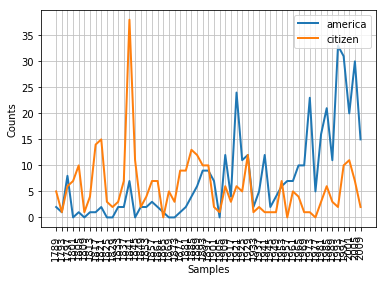

In [19]:
cfd = nltk.ConditionalFreqDist(
            (target, fileid[:4])
            for fileid in inaugural.fileids()
            for w in inaugural.words(fileid)
            for target in ['america', 'citizen']
            if w.lower().startswith(target))
cfd.plot()

## 1.6   Annotated Text Corpora
### Annotated Text Corpora 是包含許多文集的POS標籤、名稱、作者、內文資料的註解文集，為了來方便進行文集的查詢所產生
### 下列的表列出一些文集，如何下載參閱 http://nltk.org/data ，如何使用參閱 http://nltk.org/howto
 ![table.jpg](https://i.imgur.com/GZhREMx.jpg)

## 1.7   Corpora in Other Languages
### nltk有許多語言的語料庫，在某些情況下，你需要進行文字的編碼才能正常操作。

In [22]:
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [23]:
 nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [26]:
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

### udhr Corpora 中包括了超過300種語言的“世界人權宣言”

In [28]:
nltk.corpus.udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [9]:
nltk.corpus.udhr.words('Chinese_Mandarin-GB2312')

['世界人权宣言', '联合国大会一九四八年十二月十日第217A', '(', 'III', ')', ...]

### 使用ConditionalFreqDist()來計算在不同語言中每個單字長度的數量

cumulative=True 會將每筆數量一直累加

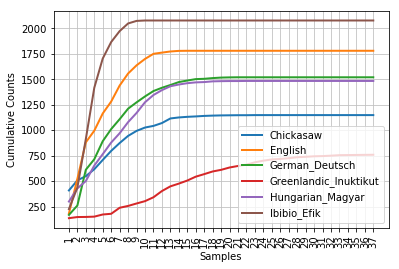

In [21]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
     'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

## 1.8   Text Corpus Structure
### 上述以提到許多種類的文集結構，最簡單的是沒有任何結構，就是單純的一個文件，但通常文件都會依照來源、作者、語言等來分類，有時類別可能會重複，常發生在主題相關的結構，也有些文件擁有時間結構，常出現於新聞文集中。
![table2.jpg](https://i.imgur.com/8DDh60x.jpg)


### nltk中的基本函式
![table3.jpg](https://i.imgur.com/NKfiaoW.jpg)

In [27]:
from nltk.corpus import gutenberg
raw = gutenberg.raw("burgess-busterbrown.txt")
raw [1:20]

'The Adventures of B'

In [28]:
words = gutenberg.words("burgess-busterbrown.txt")
words[1:20]

['The',
 'Adventures',
 'of',
 'Buster',
 'Bear',
 'by',
 'Thornton',
 'W',
 '.',
 'Burgess',
 '1920',
 ']',
 'I',
 'BUSTER',
 'BEAR',
 'GOES',
 'FISHING',
 'Buster',
 'Bear']

In [30]:
sents = gutenberg.sents("burgess-busterbrown.txt")
sents[1:20]

[['I'],
 ['BUSTER', 'BEAR', 'GOES', 'FISHING'],
 ['Buster',
  'Bear',
  'yawned',
  'as',
  'he',
  'lay',
  'on',
  'his',
  'comfortable',
  'bed',
  'of',
  'leaves',
  'and',
  'watched',
  'the',
  'first',
  'early',
  'morning',
  'sunbeams',
  'creeping',
  'through',
  'the',
  'Green',
  'Forest',
  'to',
  'chase',
  'out',
  'the',
  'Black',
  'Shadows',
  '.'],
 ['Once',
  'more',
  'he',
  'yawned',
  ',',
  'and',
  'slowly',
  'got',
  'to',
  'his',
  'feet',
  'and',
  'shook',
  'himself',
  '.'],
 ['Then',
  'he',
  'walked',
  'over',
  'to',
  'a',
  'big',
  'pine',
  '-',
  'tree',
  ',',
  'stood',
  'up',
  'on',
  'his',
  'hind',
  'legs',
  ',',
  'reached',
  'as',
  'high',
  'up',
  'on',
  'the',
  'trunk',
  'of',
  'the',
  'tree',
  'as',
  'he',
  'could',
  ',',
  'and',
  'scratched',
  'the',
  'bark',
  'with',
  'his',
  'great',
  'claws',
  '.'],
 ['After',
  'that',
  'he',
  'yawned',
  'until',
  'it',
  'seemed',
  'as',
  'if',
  'his',

## 1.9   Loading your own Corpus
### 如果有自己的文字集，可以在 PlaintextCorpusReader 將其加載進程式中

corpus_root 為文集的路徑

' .* ' 為正規表示法，匹配所有檔案

In [89]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/Users/user/Desktop/UDIC/KCM/zhwiki/AA/'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

['wiki_00',
 'wiki_01',
 'wiki_02',
 'wiki_03',
 'wiki_04',
 'wiki_05',
 'wiki_06',
 'wiki_07',
 'wiki_08',
 'wiki_09',
 'wiki_10',
 'wiki_11',
 'wiki_12',
 'wiki_13',
 'wiki_14',
 'wiki_15',
 'wiki_16',
 'wiki_17',
 'wiki_18',
 'wiki_19',
 'wiki_20',
 'wiki_21',
 'wiki_22',
 'wiki_23',
 'wiki_24',
 'wiki_25',
 'wiki_26',
 'wiki_27',
 'wiki_28',
 'wiki_29',
 'wiki_30',
 'wiki_31',
 'wiki_32',
 'wiki_33',
 'wiki_34',
 'wiki_35',
 'wiki_36',
 'wiki_37',
 'wiki_38',
 'wiki_39',
 'wiki_40',
 'wiki_41',
 'wiki_42',
 'wiki_43',
 'wiki_44',
 'wiki_45',
 'wiki_46',
 'wiki_47',
 'wiki_48',
 'wiki_49',
 'wiki_50',
 'wiki_51',
 'wiki_52',
 'wiki_53',
 'wiki_54',
 'wiki_55',
 'wiki_56',
 'wiki_57',
 'wiki_58',
 'wiki_59',
 'wiki_60',
 'wiki_61',
 'wiki_62',
 'wiki_63',
 'wiki_64',
 'wiki_65',
 'wiki_66',
 'wiki_67',
 'wiki_68',
 'wiki_69',
 'wiki_70',
 'wiki_71',
 'wiki_72',
 'wiki_73',
 'wiki_74',
 'wiki_75',
 'wiki_76',
 'wiki_77',
 'wiki_78',
 'wiki_79',
 'wiki_80',
 'wiki_81',
 'wiki_82',
 'wi

In [85]:
wordlists.words('wiki_00')

['<', 'doc', 'id', '="', '13', '"', 'url', '="', ...]

### 假如你的文字集有進行分類的 可使用 PlaintextCorpusReader 來進行更進階的解析

In [92]:
from nltk.corpus import BracketParseCorpusReader
corpus_root = '/Users/user/Desktop/UDIC/KCM/zhwiki/'
file_pattern = ".*/wiki.*"
ptb = BracketParseCorpusReader(corpus_root, file_pattern)
ptb.fileids()

['AA/wiki_00',
 'AA/wiki_01',
 'AA/wiki_02',
 'AA/wiki_03',
 'AA/wiki_04',
 'AA/wiki_05',
 'AA/wiki_06',
 'AA/wiki_07',
 'AA/wiki_08',
 'AA/wiki_09',
 'AA/wiki_10',
 'AA/wiki_11',
 'AA/wiki_12',
 'AA/wiki_13',
 'AA/wiki_14',
 'AA/wiki_15',
 'AA/wiki_16',
 'AA/wiki_17',
 'AA/wiki_18',
 'AA/wiki_19',
 'AA/wiki_20',
 'AA/wiki_21',
 'AA/wiki_22',
 'AA/wiki_23',
 'AA/wiki_24',
 'AA/wiki_25',
 'AA/wiki_26',
 'AA/wiki_27',
 'AA/wiki_28',
 'AA/wiki_29',
 'AA/wiki_30',
 'AA/wiki_31',
 'AA/wiki_32',
 'AA/wiki_33',
 'AA/wiki_34',
 'AA/wiki_35',
 'AA/wiki_36',
 'AA/wiki_37',
 'AA/wiki_38',
 'AA/wiki_39',
 'AA/wiki_40',
 'AA/wiki_41',
 'AA/wiki_42',
 'AA/wiki_43',
 'AA/wiki_44',
 'AA/wiki_45',
 'AA/wiki_46',
 'AA/wiki_47',
 'AA/wiki_48',
 'AA/wiki_49',
 'AA/wiki_50',
 'AA/wiki_51',
 'AA/wiki_52',
 'AA/wiki_53',
 'AA/wiki_54',
 'AA/wiki_55',
 'AA/wiki_56',
 'AA/wiki_57',
 'AA/wiki_58',
 'AA/wiki_59',
 'AA/wiki_60',
 'AA/wiki_61',
 'AA/wiki_62',
 'AA/wiki_63',
 'AA/wiki_64',
 'AA/wiki_65',
 'AA/wiki_

In [94]:
ptb.sents(fileids='AA/wiki_62')

[['right', 'provision', 'Copyright', 'legislation', 'collectives', 'TB1', 'VX2', 'WO', 'YN', '+', 'Prize', 'NT7', 'platform', 'Listener', 'Process', 'Programming', 'Tree', 'management', 'scripting', 'controls', 'services', 'Service', 'service', 'service', 'Part', 'Event', 'engine', 'page', 'master', 'Service', 'Development', 'No.574', 'f', 'Henson', 'Planet', 'Channel', '岛', 'benefits', 'E', 'S', 'E', 'S', 'Cabot', 'Cartier', 'Gilbert', 'manifold', 'geometry', 'Finsler']]

## Part 2  Conditional Frequency Distributions

### 2.1   Conditions and Events

### 條件頻率分佈需要將每個事件與條件配對。所以我們不必處理一系列的單詞，而是要處理一對的序列：
### pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...]

In [98]:
from nltk.corpus import brown
len(brown.categories())

15

In [99]:
len(brown.words())

1161192

### 每對都是以（條件，事件）組成，假設使用brown文集，那麼將有15個條件（每個類型一個）和1,161,192個事件（每個字一個），共有 15 * 1161192 對

## 2.2   Counting Words by Genre
### 在計算頻率分佈時，FreqDist()是獲得單一的列表，ConditionalFreqDist()則是獲得一對的列表

In [121]:
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
for ele in fdist:
    print(ele + ': ' + str(fdist[ele]))

the: 6386
fulton: 14
county: 61
grand: 19
jury: 46
said: 406
friday: 41
an: 311
investigation: 11
of: 2861
atlanta's: 4
recent: 20
primary: 17
election: 41
produced: 6
``: 732
no: 120
evidence: 17
'': 702
that: 829
any: 94
irregularities: 3
took: 47
place: 33
.: 4030
further: 18
in: 2020
term-end: 1
presentments: 1
city: 93
executive: 18
committee: 75
,: 5188
which: 245
had: 281
over-all: 2
charge: 18
deserves: 3
praise: 2
and: 2186
thanks: 6
atlanta: 14
for: 969
manner: 7
was: 717
conducted: 8
september-october: 1
term: 13
been: 212
charged: 12
by: 504
superior: 7
court: 55
judge: 39
durwood: 1
pye: 1
to: 2144
investigate: 3
reports: 13
possible: 29
hard-fought: 1
won: 24
mayor-nominate: 1
ivan: 2
allen: 7
jr.: 46
only: 111
a: 2130
relative: 3
handful: 1
such: 74
received: 33
considering: 3
widespread: 4
interest: 32
number: 32
voters: 13
size: 8
this: 320
it: 478
did: 64
find: 16
many: 72
georgia's: 7
registration: 2
laws: 30
are: 330
outmoded: 1
or: 174
inadequate: 4
often: 14
ambig

moreover: 4
qualified: 5
young: 41
going: 22
dentistry: 1
can't: 15
afford: 4
contributions: 9
scholarship: 3
equal: 4
$1,500: 3
one-fourth: 1
based: 5
$2,000: 2
government: 73
5.1: 1
21: 11
1966: 3
matching: 8
totaling: 3
700: 2
constructing: 1
enlarging: 1
capacity: 5
existing: 5
area: 40
doubling: 1
dollar: 6
initial: 4
appropriation: 2
stimulatory: 1
improve: 4
unspecified: 3
sum: 3
experimental: 3
field: 32
children's: 7
bureau: 6
national: 72
asks: 2
vocational: 3
rehabilitation: 2
how: 42
facilities: 10
propose: 1
increasing: 3
540: 1
direct: 6
combine: 2
indispensable: 2
elements: 3
sound: 4
knowledge: 10
reaction: 7
along: 37
lines: 18
placing: 3
aged-care: 1
criticized: 5
backed: 1
hailed: 2
republican: 26
leader: 24
dirksen: 1
ill.: 5
halleck: 2
ind.: 1
persuade: 5
change: 11
compulsory: 1
voluntary: 5
enacted: 1
rayburn: 6
tex.: 5
mighty: 3
thing: 15
prediction: 1
fate: 1
hastily: 1
pressure: 12
tonight: 10
confirmed: 1
weaver: 4
housing: 17
11: 18
floor: 14
record: 35
scat

instructed: 1
salem: 7
statewide: 2
mothers: 2
greeting: 3
mark: 11
hatfield: 2
reception: 9
noon: 3
emerald: 1
empire: 2
kiwanis: 1
speak: 3
willamette: 3
swearing: 1
bryson: 1
circuit: 4
washington-oregon: 1
game: 51
beaverton: 5
no.: 6
examined: 1
blueprints: 1
specifications: 1
workshop: 6
$3.5: 2
900-student: 1
6-3-3: 1
8-4: 1
$581,000: 1
masonic: 3
temple: 5
$25-a-plate: 1
dinner: 23
honoring: 3
organized: 6
p.m.: 41
roosevelt: 3
4:30: 2
blaine: 1
whipple: 1
oregon: 4
speakers: 3
fund-raising: 2
edith: 1
al: 10
ullman: 1
norman: 9
nilsen: 1
terry: 5
schrunk: 1
oak: 5
grove: 4
lodge: 5
dec.: 7
a.m.: 19
salter: 1
seeks: 3
re-election: 2
huffman: 1
five-year: 1
brod: 1
barbara: 5
njust: 1
bubenik: 1
vacated: 2
hugh: 1
stout: 1
two-year: 3
culbertson: 1
steeves: 1
piersee: 1
w.m.: 1
sexton: 2
theodore: 4
heitschmidt: 1
stronger: 4
beliefs: 3
grasp: 1
delegates: 9
assemblies: 7
god: 8
coliseum: 1
strengthen: 3
denomination's: 2
modern: 15
trends: 2
bible: 5
belief: 6
dependence: 1
rev

gods: 2
gala: 5
music: 18
dancing: 8
furnished: 1
uhles: 1
orchestra: 15
guests: 18
suites: 1
patio: 2
genial: 1
nightly: 1
hackstaff: 1
luette: 1
bowman: 2
celebrates: 1
birthday: 3
chase: 5
sheila: 1
mercy: 3
grandparents: 2
mullenax: 2
kittredge: 1
mcintosh: 1
buell: 1
santa: 6
calif.: 8
vroman: 1
manzanola: 1
plaza: 1
merrill: 1
shoup: 4
colorado: 4
palace: 2
brig.: 1
mcdermott: 1
black: 12
officers': 1
piero: 1
luise: 1
emilio: 1
bassi: 1
bassis: 1
stag: 1
precede: 1
cocktails: 2
dining: 5
betsy: 1
parker: 5
eastern: 4
bldg.: 1
juniors: 2
staged: 5
neusteters: 1
preceded: 3
teter: 1
mead: 1
decorations: 2
stanley: 2
wright: 1
pate: 1
milton: 4
bernet: 1
rollie: 1
bradford: 2
butler: 1
carr: 1
campbell: 1
carruthers: 2
cris: 1
dobbins: 1
glass: 1
alfred: 8
hicks: 1
magarrell: 1
willett: 1
myron: 1
neusteter: 1
sudier: 1
welborn: 1
d.c.: 3
kira: 1
r.l.: 1
rickenbaugh: 2
e.o.: 1
scarsdale: 1
cheery: 2
smile: 1
compassionate: 1
practical: 4
down-to-earth: 2
qualities: 2
esther: 1
marr

543: 1
janitors: 2
workmen: 1
factories: 3
leavitt: 6
3247: 1
kedzie: 1
dominic: 1
senese: 1
teamster: 1
cousin: 1
accardo: 1
onetime: 1
pesce: 2
deodorant: 2
sanitation: 1
1215: 1
supervise: 1
$1,600: 1
$12,500: 2
leavitt's: 1
warehouseman's: 1
salesman's: 1
bottling: 1
workers': 1
closely: 7
$40,000: 1
repaid: 1
glimco's: 1
drivers': 1
1213-15: 1
radiation: 2
micro-microcurie: 1
meter: 1
detonation: 2
radioactive: 1
occur: 1
curtis: 1
huff: 10
1630: 1
suppressed: 1
warrant: 2
charging: 1
embezzling: 1
undetermined: 1
dearborn: 1
lien: 1
huff's: 1
antone: 1
gregorio: 4
embezzlement: 1
satisfaction: 2
mechanic's: 1
liens: 1
$109: 1
lucrative: 1
lists: 4
blaber: 1
1020: 1
cashed: 1
card: 1
bonn: 2
$28,700,000: 1
greek: 1
nazi: 1
persecution: 1
hottest: 1
shares: 19
dallas-headquartered: 1
allotting: 1
explaining: 1
investors: 11
counted: 1
lucky: 1
trading: 5
underwriting: 1
$12.50: 2
over-the-counter: 1
eppler: 1
guerin: 2
underwriter: 1
$17: 1
$22: 1
circulating: 1
inquiries: 3
reams:

inform: 1
undefined: 1
hypocrisy: 1
foolish: 1
heavy-electrical-goods: 2
rig: 1
allocate: 1
price-setting: 1
multi-product: 1
marginal: 2
manufacture: 1
accounting: 1
varied: 1
enterprises: 1
flex: 1
muscles: 1
accuse: 1
monopoly: 3
self-restraint: 1
protection: 3
implicit: 2
wide-open: 1
decree: 1
fellows: 1
tool: 1
theory: 2
govern: 1
enforcers: 1
managements: 2
facts: 1
flood: 1
mea: 1
culpas: 1
scapegoats: 1
usefulness: 1
thurman: 1
folklore: 1
capitalism: 1
211: 1
unconsciously: 1
organizations: 3
ideology: 1
214: 1
uncontrolled: 1
dictatorship: 1
215: 1
penalties: 2
invoked: 1
pp.: 1
228-229: 1
empires: 1
fantastic: 1
management's: 1
evaluating: 1
occasional: 1
irrational: 1
nolo: 1
contendere: 1
nominal: 1
untrammeled: 1
sentences: 1
unprecedented: 2
prosecutions: 1
ineptness: 1
fictitious: 1
impersonal: 1
devised: 1
pretends: 1
rational: 2
advocating: 1
1933: 1
7a: 1
impolitic: 1
taft-hartley: 1
landrum-griffin: 1
collective-bargaining: 1
palmed: 1
organizers: 1
gigantic: 1
tor

In [120]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions = genres, samples = modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


### 計算出在new、romance兩個類別中總共有幾對

In [129]:
genre_word = [(genre, word)
              for genre in ['news', 'romance'] 
              for word in brown.words(categories=genre)]
len(genre_word)

170576

### 可以查看出列表前面是由new組成，而後面則由romance組成

In [130]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [132]:
genre_word[-4:]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

### 我們可以用此列表來創建一個ConditionalFreqDist，即可查詢其中有兩個條件，並列出條件名稱

In [138]:
cfd = nltk.ConditionalFreqDist(genre_word)
print(cfd)

<ConditionalFreqDist with 2 conditions>


In [139]:
cfd.conditions()

['news', 'romance']

### 查看兩個條件在FreqDist中的頻率分布

In [140]:
print(cfd['news'])

<FreqDist with 14394 samples and 100554 outcomes>


In [141]:
print(cfd['romance'])

<FreqDist with 8452 samples and 70022 outcomes>


### 列出romance中頻率最多的20個

In [142]:
cfd['romance'].most_common(20)

[(',', 3899),
 ('.', 3736),
 ('the', 2758),
 ('and', 1776),
 ('to', 1502),
 ('a', 1335),
 ('of', 1186),
 ('``', 1045),
 ("''", 1044),
 ('was', 993),
 ('I', 951),
 ('in', 875),
 ('he', 702),
 ('had', 692),
 ('?', 690),
 ('her', 651),
 ('that', 583),
 ('it', 573),
 ('his', 559),
 ('she', 496)]

### 列出was在romance中出現的頻率

In [144]:
cfd['romance']['was']

993

## 2.3   Plotting and Tabulating Distributions
### ConditionalFreqDist也提供了一些有用的表格和繪圖方法

### 我們使用 inaugural 文集，條件分成"美國"和"公民"，計算出在每個文件中分別出現"美國"或"公民"的次數，並且我們使用文件的年份來統計，形成('america', '1865')的集合。

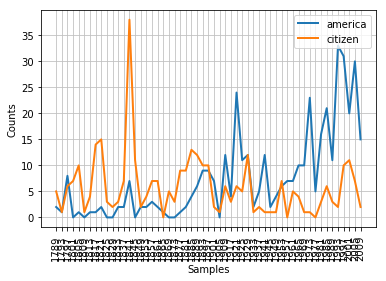

In [151]:
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
     (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))
cfd.plot()

### 我們使用 udhr 文集，來統計在各語言中每個字的長度數量。
tabulate() 可以使用 conditions 來指定要顯示的類別

cumulative 是否累加結果

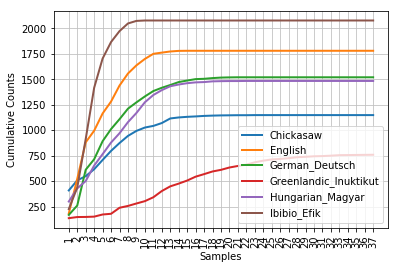

In [4]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
     'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

In [7]:
cfd.tabulate(conditions=['English', 'German_Deutsch'],
             samples=range(10), cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


## 2.4   Generating Random Text with Bigrams
###  bigrams() 函數可以將一個單詞列表，構建成一個連續單詞配對列表。為了看到結果我們必須使用list()函數將結果包起來

In [8]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven',
        'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

### 使用之前的ConditionalFreqDist()將產生的bigrams()代入，即可以得到一個單詞與鄰近詞配對的次數

In [19]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)
cfd['living']

FreqDist({',': 1,
          '.': 1,
          'creature': 7,
          'soul': 1,
          'substance': 2,
          'thing': 4})

### 使用generate_model模組，我們可以找出一個詞配對的最大值，並在用最大值依序尋找其最大值，最後得到一個隨機組成的句子。

In [11]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

### nltk條件分佈頻率的基本函式
!['table4.jpg'](https://i.imgur.com/HEAeqiq.jpg)

## Part 3   More Python: Reusing Code
## 3.1   Creating Programs with a Text Editor
### python 內建的IDLE 雖然輸入即可執行，但當需要大量程式碼執行時，使用文字編輯器是更好的選擇。

## 3.2   Functions

### 當程式中有部分程式碼一直不斷重複的執行時，可以使用def來定義一個function，當要執行此段程式碼時呼叫function即可

### lexical_diversity 函式在計算詞的多樣性，vocab_size(詞的種類) / word_count(詞的總數)

In [31]:
def lexical_diversity(my_text_data):
     word_count = len(my_text_data)
     vocab_size = len(set(my_text_data))
     diversity_score = vocab_size / word_count
     return diversity_score

from nltk.corpus import genesis
kjv = genesis.words('english-kjv.txt')
lexical_diversity(kjv)

0.06230453042623537

### plural 函式在模擬英文單字複數的變化

In [33]:
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'

plural('fairy')

'fairies'

In [34]:
plural('woman')

'women'

## 3.3   Modules
### 當程式碼越寫越多，可以將一些有用的程式碼建成模組，方便之後撰寫時可以直接import進程式碼中使用

In [3]:
from text_proc import plural
plural('fairy')

'fairies'

In [4]:
plural('woman')

'women'

## Part4   Lexical Resources

## 4.1   Wordlist Corpora
### NLTK 包含一些單純單詞列表的文集，在Unix中的存放路徑為 /usr/share/dict/words，並提供拼字檢查器使用，使得能找出罕見或拼字錯誤的詞。

In [5]:
import nltk

In [6]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

### unusual_words 這個函式將輸入的txt檔內容(austen-sense.txt)排序後印出。

In [12]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations',
 'accompanied',
 'accounted',
 'accounts',
 'accustomary',
 'aches',
 'acknowledging',
 'acknowledgment',
 'acknowledgments',
 'acquaintances',
 'acquiesced',
 'acquitted',
 'acquitting',
 'acted',
 'actions',
 'adapted',
 'adding',
 'additions',
 'addressed',
 'addresses',
 'addressing',
 'adhering',
 'adieus',
 'adjusting',
 'administering',
 'admirers',
 'admires',
 'admitting',
 'adorned',
 'advances',
 'advantages',
 'affairs',
 'affections',
 'affects',
 'affixed',
 'afflictions',
 'afforded',
 'affording',
 'ages',
 'agitated',
 'agonies',
 'ailments',
 'aimed',
 'alarms',
 'alienated',
 'alighted',
 'alleged',
 'allenham',
 'allowances',
 'allowed',
 'allowing',
 'alluded',
 'alterations',
 'altered',
 'altering',
 'amended',
 'amounted',
 'amusements',
 'ankles',
 'annamaria',
 'annexed',
 'announced',
 'announcing',
 'annuities',
 'annum',
 

In [15]:
unusual_words(nltk.corpus.nps_chat.words())

['aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'abortions',
 'abou',
 'abourted',
 'abs',
 'ack',
 'acros',
 'actualy',
 'adams',
 'adds',
 'adduser',
 'adjusts',
 'adoted',
 'adreniline',
 'ads',
 'adults',
 'afe',
 'affairs',
 'affari',
 'affects',
 'afk',
 'agaibn',
 'ages',
 'aggravated',
 'agurlwithbigguns',
 'ahah',
 'ahahah',
 'ahahh',
 'ahahha',
 'ahh',
 'ahhah',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'aiiiiiiiiiiiiiiiiiiiiiiii',
 'aiken',
 'aime',
 'akdt',
 'akon',
 'akron',
 'akst',
 'aligator',
 'allergies',
 'allo',
 'allowed',
 'aloha',
 'alohaaa',
 'alohas',
 'alot',
 'alotta',
 'alternatives',
 'alterz',
 'alwys',
 'alzheimers',
 'amazingness',
 'americans',
 'anithing',
 'ans',
 'answering',
 'answers',
 'antidepressants',
 'anygirl',
 'anymore',
 'anythin',
 'anytime',
 'anyyyyyyyyyyyyyyyyy',
 'aok',
 'apoligize',
 'appearently',
 'appears',
 'applaudes',
 'appleton',
 'appologise',
 'appologize',
 'aqwesome',
 'arggghhh',
 'argh',
 'armtnpeat',
 'arres

### 刪除以存在過的詞，並只留下少見或拼錯的詞。

## NLTK也有stopwords的文集:

In [16]:
from nltk.corpus import stopwords

In [20]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

### content_fraction 這個函式用來計算一段文字中不屬於stopwords的比例有多少

In [21]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

In [24]:
content_fraction(nltk.corpus.reuters.words())

0.735240435097661

### 由此可知我們能透過stopwords來濾掉約莫四分之一的文字量。

### wordlist 在解 word puzzles 時也很有幫助，過程中一一檢查是否有符合的條件，並且能方便規定詞的長度、必要的字母及是否允許重複等等。

![word_puzzle.jpg](https://i.imgur.com/TPHPgl8.jpg)

In [28]:
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()

[w for w in wordlist if len(w) >= 6
                    and obligatory in w
                    and nltk.FreqDist(w) <= puzzle_letters]

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

### 另外也有一個姓名的wordlist corpus，包含超過8000個名字並按照性別分為兩個不同的檔案:

In [31]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

### 試圖找出哪些名字同時出現在male與female名單中

In [32]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

## 透過 matplotlib 來繪製折線圖:
### 可得知普遍來說英文名字結尾為a的大部分都是女生
(name[-1]為名字的最後一個字母)

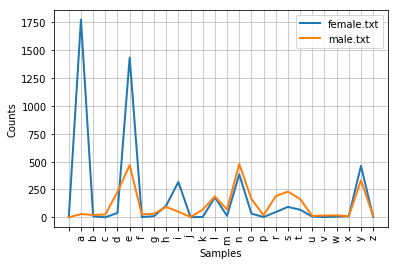

In [42]:
from matplotlib import pylab

cfd = nltk.ConditionalFreqDist(
            (fileid, name[-1])
            for fileid in names.fileids()
            for name in names.words(fileid))
cfd.plot()
# print(cfd['female.txt']['a'])

### 這張圖告訴我們男性與女性名字結尾的字母分布，可以看出女性名字大多以a、e及i結尾；男性名字大多為k、o、r、s及t結尾；h及l結為則較為模糊。

## 4.2   A Pronouncing Dictionary

### NLTK 有為語音合成器設計一個CMU發音辭典，內含133737組發音，以下列出其中8組來展示。

In [45]:
entries = nltk.corpus.cmudict.entries()
len(entries)

133737

### 由於某些單詞可能會有兩個不同的發音法，像是"fire"能讀作：單音節F AY1 R 或 雙音節F AY1 ER0。
### 這些符號的是由Arpabet來制定，詳細請見參考: http://en.wikipedia.org/wiki/Arpabet

In [46]:
for entry in entries[42371:42379]:
    print(entry)

('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


### 再將entries拆成word及pron兩個部分，pron表示總共分為幾個音節。
### 以下列出音節數3個且以"P"開頭及"T"結尾的word，並分別以ph1、ph2、ph3表示。

In [48]:
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron
        if ph1 == 'P' and ph3 == 'T':
            print(word, ph2, end=' ')

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

### 試著列出結尾音為"nicks"發音的詞:

In [49]:
syllable = ['N', 'IH0', 'K', 'S']
[word for word, pron in entries if pron[-4:] == syllable]

["atlantic's",
 'audiotronics',
 'avionics',
 'beatniks',
 'calisthenics',
 'centronics',
 'chamonix',
 'chetniks',
 "clinic's",
 'clinics',
 'conics',
 'conics',
 'cryogenics',
 'cynics',
 'diasonics',
 "dominic's",
 'ebonics',
 'electronics',
 "electronics'",
 "endotronics'",
 'endotronics',
 'enix',
 'environics',
 'ethnics',
 'eugenics',
 'fibronics',
 'flextronics',
 'harmonics',
 'hispanics',
 'histrionics',
 'identics',
 'ionics',
 'kibbutzniks',
 'lasersonics',
 'lumonics',
 'mannix',
 'mechanics',
 "mechanics'",
 'microelectronics',
 'minix',
 'minnix',
 'mnemonics',
 'mnemonics',
 'molonicks',
 'mullenix',
 'mullenix',
 'mullinix',
 'mulnix',
 "munich's",
 'nucleonics',
 'onyx',
 'organics',
 "panic's",
 'panics',
 'penix',
 'pennix',
 'personics',
 'phenix',
 "philharmonic's",
 'phoenix',
 'phonics',
 'photronics',
 'pinnix',
 'plantronics',
 'pyrotechnics',
 'refuseniks',
 "resnick's",
 'respironics',
 'sconnix',
 'siliconix',
 'skolniks',
 'sonics',
 'sputniks',
 'technics

#### 可以發現word的結尾不盡相同，有nics、niks、nix，甚至是ntic's (e.g. atlantic's)。

#### 更多例子:

In [50]:
[w for w, pron in entries if pron[-1] == 'M' and w[-1] == 'n']

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']

In [51]:
sorted(set(w[:2] for w, pron in entries if pron[0] == 'N' and w[0] != 'n'))

['gn', 'kn', 'mn', 'pn']

### 根據給定的音節數及重音位置找出對應的words。
primary stress (1), secondary stress (2) and no stress (0)

In [53]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

In [54]:
[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']]

['abbreviated',
 'abbreviated',
 'abbreviating',
 'accelerated',
 'accelerating',
 'accelerator',
 'accelerators',
 'accentuated',
 'accentuating',
 'accommodated',
 'accommodating',
 'accommodative',
 'accumulated',
 'accumulating',
 'accumulative',
 'accumulator',
 'accumulators',
 'accusatory',
 'adenovirus',
 'adjudicated',
 'adjudicating',
 'administrating',
 'administrative',
 'administrator',
 "administrators'",
 "administrator's",
 'administrators',
 'adulterated',
 'adventurism',
 'adventurism',
 'affiliated',
 'affiliated',
 "affiliated's",
 'affiliating',
 'alleviated',
 'alleviated',
 'alleviating',
 'alliteration',
 'alliterative',
 'amalgamated',
 "amalgamated's",
 'amalgamating',
 'ameliorated',
 'ameridata',
 'amoxicillin',
 'anachronism',
 'anachronisms',
 'annihilated',
 'annihilating',
 'antagonism',
 'antagonisms',
 'antagonizing',
 'anticipated',
 'anticipated',
 'anticipating',
 'apologizes',
 'apologizing',
 'apothecary',
 'appreciated',
 'appreciating',
 'apprec

In [55]:
[w for w, pron in entries if stress(pron) == ['0', '2', '0', '1', '0']]

['abbreviation',
 'abbreviations',
 'abomination',
 'abortifacient',
 'abortifacients',
 'academicians',
 'accommodation',
 'accommodations',
 'accreditation',
 'accreditations',
 'accumulation',
 'accumulations',
 'acetylcholine',
 'acetylcholine',
 'adjudication',
 'administration',
 "administration's",
 'administrations',
 "administrations'",
 'aduliadae',
 'adulteration',
 'affiliation',
 'affiliations',
 'aficionados',
 'agglomeration',
 'ahasuerus',
 'ajinomoto',
 'alleviation',
 'amalgamation',
 'ambrosiano',
 'amelioration',
 'americana',
 "americana's",
 'americanas',
 'americano',
 'americanos',
 'anachronistic',
 'anencephalic',
 'annihilation',
 'antagonistic',
 'anticipation',
 'anticipations',
 'apocalyptic',
 'apologetic',
 'apotheosis',
 'appreciation',
 'appropriation',
 'appropriations',
 'approximation',
 'approximations',
 'aristocratic',
 'arunachalam',
 'assassination',
 'assassinations',
 'assimilation',
 'association',
 'association',
 'associations',
 "associat

### 也可以利用條件頻率分布(conditional frequency distribution)來搜尋對應的words。
#### 以下列出三個音節且以"P"開頭的words，並根據不同的結尾音來分組:

In [59]:
p3 = [(pron[0]+'-'+pron[2], word)
    for (word, pron) in entries
        if pron[0] == 'P' and len(pron) == 3]

cfd = nltk.ConditionalFreqDist(p3)
for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words = sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template, wordstring[:70] + "...")

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


### 除了透過迴圈列出所有的符合的words之外，也可以查詢特定word的發音。

In [61]:
prondict = nltk.corpus.cmudict.dict()
prondict['fire']

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]

### 如果發現欲查詢的word並不存在pronouncing dictionary中，則會發生KeyError。

In [62]:
prondict['blog']

KeyError: 'blog'

### 可以透過手動的方式新增"blog"這個word
但並不影響NLTK的文集，下次開啟時blog將會消失在pronouncing dictionary中

In [63]:
prondict['blog'] = [['B', 'L', 'AA1', 'G']]
prondict['blog']

[['B', 'L', 'AA1', 'G']]

#### 每個詞可能有很多種詞性變化，若再加上prondict[w][0] 限制則只列出當前輸入的詞性發音。

In [68]:
text = ['natural', 'language', 'processing']
[ph for w in text for ph in prondict[w][0]]
# [ph for w in text for ph in prondict[w]]

['N',
 'AE1',
 'CH',
 'ER0',
 'AH0',
 'L',
 'L',
 'AE1',
 'NG',
 'G',
 'W',
 'AH0',
 'JH',
 'P',
 'R',
 'AA1',
 'S',
 'EH0',
 'S',
 'IH0',
 'NG']

## 4.3   Comparative Wordlists

### NLTK 也有包含所謂的Swadesh wordlists，以多種語言列出大約200個常用詞且使用ISO 639 雙字母代碼來識別。

In [72]:
from nltk.corpus import swadesh
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

此列表為國家代碼

In [78]:
swadesh.words('en')

['I',
 'you (singular), thou',
 'he',
 'we',
 'you (plural)',
 'they',
 'this',
 'that',
 'here',
 'there',
 'who',
 'what',
 'where',
 'when',
 'how',
 'not',
 'all',
 'many',
 'some',
 'few',
 'other',
 'one',
 'two',
 'three',
 'four',
 'five',
 'big',
 'long',
 'wide',
 'thick',
 'heavy',
 'small',
 'short',
 'narrow',
 'thin',
 'woman',
 'man (adult male)',
 'man (human being)',
 'child',
 'wife',
 'husband',
 'mother',
 'father',
 'animal',
 'fish',
 'bird',
 'dog',
 'louse',
 'snake',
 'worm',
 'tree',
 'forest',
 'stick',
 'fruit',
 'seed',
 'leaf',
 'root',
 'bark (from tree)',
 'flower',
 'grass',
 'rope',
 'skin',
 'meat',
 'blood',
 'bone',
 'fat (noun)',
 'egg',
 'horn',
 'tail',
 'feather',
 'hair',
 'head',
 'ear',
 'eye',
 'nose',
 'mouth',
 'tooth',
 'tongue',
 'fingernail',
 'foot',
 'leg',
 'knee',
 'hand',
 'wing',
 'belly',
 'guts',
 'neck',
 'back',
 'breast',
 'heart',
 'liver',
 'drink',
 'eat',
 'bite',
 'suck',
 'spit',
 'vomit',
 'blow',
 'breathe',
 'laugh',

列出英文的常用詞

In [79]:
fr2en = swadesh.entries(['fr', 'en'])
fr2en

[('je', 'I'),
 ('tu, vous', 'you (singular), thou'),
 ('il', 'he'),
 ('nous', 'we'),
 ('vous', 'you (plural)'),
 ('ils, elles', 'they'),
 ('ceci', 'this'),
 ('cela', 'that'),
 ('ici', 'here'),
 ('là', 'there'),
 ('qui', 'who'),
 ('quoi', 'what'),
 ('où', 'where'),
 ('quand', 'when'),
 ('comment', 'how'),
 ('ne...pas', 'not'),
 ('tout', 'all'),
 ('plusieurs', 'many'),
 ('quelques', 'some'),
 ('peu', 'few'),
 ('autre', 'other'),
 ('un', 'one'),
 ('deux', 'two'),
 ('trois', 'three'),
 ('quatre', 'four'),
 ('cinq', 'five'),
 ('grand', 'big'),
 ('long', 'long'),
 ('large', 'wide'),
 ('épais', 'thick'),
 ('lourd', 'heavy'),
 ('petit', 'small'),
 ('court', 'short'),
 ('étroit', 'narrow'),
 ('mince', 'thin'),
 ('femme', 'woman'),
 ('homme', 'man (adult male)'),
 ('homme', 'man (human being)'),
 ('enfant', 'child'),
 ('femme, épouse', 'wife'),
 ('mari, époux', 'husband'),
 ('mère', 'mother'),
 ('père', 'father'),
 ('animal', 'animal'),
 ('poisson', 'fish'),
 ('oiseau', 'bird'),
 ('chien', 'dog'

列出法文(fr)與英文(en)常用詞的對照表

In [81]:
translate = dict(fr2en)
translate['chien']

'dog'

In [82]:
translate['jeter']

'throw'

也可以對單獨的word進行轉換

### 可以將多個語言同時轉換成指定的語言，並將這些轉換加入到我們原始的translate dictionary中。

In [85]:
de2en = swadesh.entries(['de', 'en'])    # German-English
es2en = swadesh.entries(['es', 'en'])    # Spanish-English
translate.update(dict(de2en))
translate.update(dict(es2en))

In [86]:
translate['Hund']

'dog'

In [87]:
translate['perro']

'dog'

### 根據代碼列出意義相同但不同語言的word。

In [91]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']

for i in [139, 140, 141, 142]:
    print(swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


## 4.4   Shoebox and Toolbox Lexicons

### Toolbox中包含許多語言，以下列出Rotokas language(spoken on the island of Bougainville,  Papua New Guinea) 的內容。

In [102]:
from nltk.corpus import toolbox
toolbox.entries('rotokas.dic')

[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 

## Part5   WordNet
### WordNet是基於英文辭典但結構更加豐富，NLTK 包含英文的WordNet，擁有155287個words且有117659個相關同義詞。

## 5.1   Senses and Synonyms

In [105]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

a.  Benz is credited with the invention of the motorcar.

b.  Benz is credited with the invention of the automobile.

#### (a)mototcar與(b)automobile替換並不影響句子的意思


### 根據motorcar所對應出的同意詞集 'car.n.01' 稱為 car 的 synset (synonym set)。
#### ( 這些synset的集合稱為 lemmas )

In [106]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

### 說明car的定義及例子:

In [107]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [108]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

### 我們能透過 synset 來得知常用的幾個 lemmas

In [110]:
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

### 查詢特定的lemma

In [112]:
wn.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

### 根據特定的lemma查詢歸屬哪個synset

In [113]:
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

### 取得lemma name

In [114]:
wn.lemma('car.n.01.automobile').name()

'automobile'

### car 這個詞不單單只能用來表示車輛，這邊定義幾個比較模糊的用法及能代表的意思。

In [115]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [116]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


### 為了方便起見我們也可以列出所有關於汽車的lemmas

In [119]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

## 5.2   The WordNet Hierarchy

![WordNet_Hierarchy.jpg](https://i.imgur.com/gQuZBLg.jpg)

### WordNet 可以輕易的了解詞的概念

In [123]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]

Synset('ambulance.n.01')

In [121]:
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

### 有些words有多個路徑，因為它可以用多種方式來分類

In [124]:
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [125]:
paths = motorcar.hypernym_paths()
len(paths)

2

In [126]:
[synset.name() for synset in paths[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [127]:
[synset.name() for synset in paths[1]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'conveyance.n.03',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

### 我們也可以找出 synset 最通用的 hypernyms

In [128]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

## 5.3   More Lexical Relations

### 由細節關聯出更廣義的關係

In [130]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [131]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [132]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

### 以"mint"為例，可以發現mint.n.04是mint.n.02的一部分且製造出mint.n.05。

In [133]:
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ':', synset.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [134]:
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [135]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

### 動詞間也有互相的類似關係

In [136]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [137]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [138]:
wn.synset('tease.v.03').entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

### 反義詞

In [139]:
wn.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [140]:
wn.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

In [141]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('inclined.a.02.inclined'), Lemma('vertical.a.01.vertical')]

In [142]:
wn.lemma('staccato.r.01.staccato').antonyms()

[Lemma('legato.r.01.legato')]

### 透過dir() 可以查看詞彙的關係以及其他在synset上定義的方法

In [147]:
dir(wn.synset('harmony.n.02'))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_hypernyms',
 '_definition',
 '_examples',
 '_frame_ids',
 '_hypernyms',
 '_instance_hypernyms',
 '_iter_hypernym_lists',
 '_lemma_names',
 '_lemma_pointers',
 '_lemmas',
 '_lexname',
 '_max_depth',
 '_min_depth',
 '_name',
 '_needs_root',
 '_offset',
 '_pointers',
 '_pos',
 '_related',
 '_shortest_hypernym_paths',
 '_wordnet_corpus_reader',
 'also_sees',
 'attributes',
 'causes',
 'closure',
 'common_hypernyms',
 'definition',
 'entailments',
 'examples',
 'frame_ids',
 'hypernym_distances',
 'hypernym_paths',
 'hypernyms',
 'hyponyms',
 'instance_hypernyms',
 'instance_hyponyms',
 'jcn_similarity',
 'lch_si

## 5.4   Semantic Similarity

### 在hypernym 層次結構中最底層的必定是與其關係最密切的。

In [162]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')

In [163]:
right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

In [164]:
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [165]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [166]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

### 我們能透過每個同義詞的深度來量化這個概念，數字越大則分得越細。

In [167]:
wn.synset('baleen_whale.n.01').min_depth()

14

In [168]:
wn.synset('whale.n.02').min_depth()

13

In [169]:
wn.synset('vertebrate.n.01').min_depth()

8

In [170]:
wn.synset('entity.n.01').min_depth()

0

### path_similarity() 透過路徑的比較可以計算出兩者間的相似程度(range 0 - 1)。

In [172]:
right.path_similarity(minke)

0.25

In [173]:
right.path_similarity(orca)

0.16666666666666666

In [174]:
right.path_similarity(tortoise)

0.07692307692307693

In [175]:
right.path_similarity(novel)

0.043478260869565216

#### 可以輸入help(wn)來了解更多用法，NLTK除了有WordNet之外也有VerbNet這個動詞的詞庫，請透過nltk.corpus.verbnet來使用。